In [24]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

## Get points coordinates

In [4]:
def getPoints(name_tsp):
    with open(name_tsp) as f_o:
            data= f_o.read()
            lines = data.splitlines()
    # store metadata set information 
    name = lines[0].split(' ')[1]
        # here we expect the name of the problem

    nPoints =  np.int(lines[3].split(' ')[1])
        # here we expect the number of points in the considered instance
        
#     best_sol = np.float(lines[5].split(' ')[1])
        # here the lenght of the best solution
        
        
        # read all data points and store them 
    points = np.zeros((nPoints, 3)) # this is the structure where we will store the pts data 
    for i in range(nPoints):
        line_i = lines[7 + i].split(' ')
        points[i, 0] = int(line_i[0])
        points[i, 1] = float(line_i[1])
        points[i, 2] = float(line_i[2])
    return points

### Functions to see the points and see the path

In [5]:
def plotPoints(points, nPoints):
    plt.figure(figsize=(8, 8))
    plt.scatter(points[:, 1], points[:, 2])
    for i, txt in enumerate(np.arange(nPoints)):  # tour_found[:-1]
        plt.annotate(txt, (points[i, 1], points[i, 2]))
    plt.show()

In [6]:
def plotSolution(ordered_points, points):
    plt.figure(figsize=(8, 8))
#     plt.scatter(points[:, 1], points[:, 2])
    for i, txt in enumerate(np.arange(len(points))):  # tour_found[:-1]
        plt.annotate(txt, (points[i, 1], points[i, 2]))
        
    ordX = []
    ordY = []
    
    for i in range(0, len(ordered_points)):
        ordX.append(points[ordered_points[i],1])
        ordY.append(points[ordered_points[i],2])
    plt.plot(ordX, ordY, marker='o', color='b')

    plt.show()

In [12]:
def compute_length(solution, dist_matrix):
    total_length = 0
    starting_node = solution[0]
    from_node = starting_node
    for node in solution[1:]:
        total_length += dist_matrix[from_node, node]
        from_node = node
    total_length += dist_matrix[starting_node, from_node]
    return total_length


def distance_euc(point_i, point_j):
    rounding = 0
    x_i, y_i = point_i[0], point_i[1]
    x_j, y_j = point_j[0], point_j[1]
    distance = np.sqrt((x_i - x_j) ** 2 + (y_i - y_j) ** 2)
    return round(distance, rounding)

In [13]:
class ProblemInstance:

    def __init__(self, name_tsp):
        self.exist_opt = False
        self.optimal_tour = None
        self.dist_matrix = None

        # read raw data
        self.file_name = name_tsp
        file_object = open(self.file_name)
        data = file_object.read()
        file_object.close()
        self.lines = data.splitlines()

        # store data set information
        self.name = self.lines[0].split(': ')[1]
        self.nPoints = np.int(self.lines[3].split(': ')[1])
        self.best_sol = np.float(self.lines[5].split(': ')[1])

        # read all data points and store them
        self.points = np.zeros((self.nPoints, 3))
        for i in range(self.nPoints):
            
            line_i = self.lines[7 + i].split(' ')
#             print(line_i)
            self.points[i, 0] = int(line_i[0])
            self.points[i, 1] = line_i[1]
            self.points[i, 2] = line_i[2]
        self.create_dist_matrix();
            
    def create_dist_matrix(self):
        self.dist_matrix = np.zeros((self.nPoints, self.nPoints))

        for i in range(self.nPoints):
            for j in range(i, self.nPoints):
                self.dist_matrix[i, j] = distance_euc(self.points[i][1:3], self.points[j][1:3])
        self.dist_matrix += self.dist_matrix.T
        
    def GAP(self, found):
        return np.round(
            ((found - self.best_sol) / self.best_sol) * 100, 3)

    def ValidateSolution(self, path):
        return min(path) == 0 and max(path) == self.nPoints-1 and len(path) == len(set(path)) \
        and sum(path) == sum(i for i in range(P.nPoints))

# Following are the solutions found for run #3
## Seed = 1092841564 (randomly chosen, not farmed )

## PR439

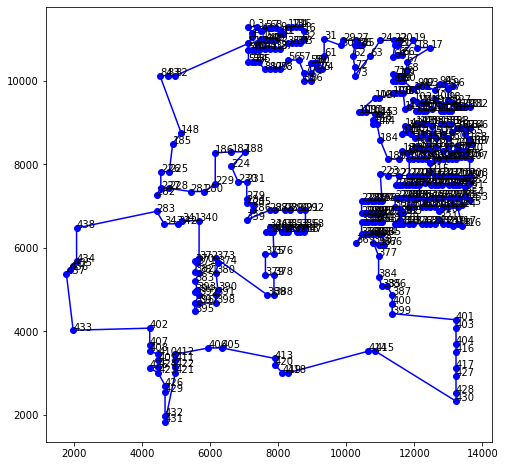

GAP IS: 0.281
Solution is valid:  True


In [14]:
x = [131,130,129,128,126,125,123,124,122,100,121,120,118,117,115,119,116,114,102,113,112,103,104,105,106,107,108,109,110,111,145,143,146,147,144,184,189,190,183,191,182,181,180,179,178,156,155,154,153,152,150,149,142,151,141,140,139,138,137,157,158,176,177,198,199,200,201,175,174,160,159,136,135,134,133,161,162,163,164,166,165,168,167,169,170,171,172,173,203,202,204,205,206,207,208,252,250,249,209,210,211,212,213,214,215,197,196,195,194,193,192,220,219,218,217,216,240,241,242,243,244,245,246,247,248,251,254,253,315,255,256,257,258,259,260,261,262,263,306,307,308,309,310,311,312,313,314,316,317,318,319,320,321,322,323,324,325,326,327,328,330,331,329,303,302,301,300,271,270,269,268,267,304,305,266,265,264,239,238,237,236,235,234,233,232,221,222,223,272,273,274,275,276,277,278,293,294,295,296,297,298,299,332,333,334,335,336,337,338,359,369,360,361,362,363,364,365,366,367,368,377,384,385,386,387,400,399,401,403,404,416,417,427,428,430,415,414,418,419,420,413,405,406,412,411,422,421,431,432,429,426,423,425,424,409,410,408,407,402,433,437,436,435,434,438,283,343,342,341,340,372,370,371,382,381,383,393,394,392,396,395,397,398,391,390,380,374,373,389,388,378,379,375,376,347,345,344,346,348,349,350,352,351,353,354,355,357,356,358,292,291,290,289,288,287,339,286,285,284,279,231,230,224,188,187,186,229,280,281,228,282,227,226,225,185,148,84,83,82,51,1,2,0,3,4,5,6,7,8,9,10,11,12,13,14,15,16,32,33,34,35,36,37,38,39,40,42,41,43,44,45,48,46,47,49,50,52,53,54,55,81,80,79,78,56,57,77,85,86,76,58,59,60,75,74,61,31,30,29,27,25,26,28,62,72,73,63,24,22,20,21,23,64,65,66,19,18,17,67,68,69,70,71,87,88,89,90,101,91,92,93,99,94,95,96,97,98,127,132] 
P = ProblemInstance('./problems/pr439.tsp')
points = getPoints('./problems/pr439.tsp')
plotSolution(x, points)
found = compute_length(x, P.dist_matrix)
print("GAP IS:", P.GAP(found))
print("Solution is valid: ", P.ValidateSolution(x))

## PCB442

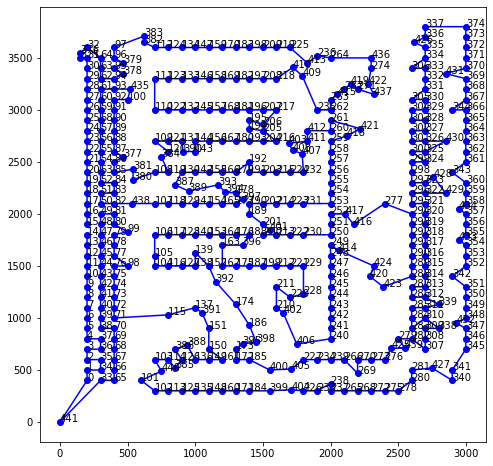

GAP IS: 0.874
Solution is valid:  True


In [15]:
x = [14,13,12,11,10,9,8,7,6,5,4,37,36,3,2,35,34,1,0,441,33,65,66,67,68,69,70,38,39,40,41,42,43,44,45,46,47,48,49,81,80,99,79,78,77,98,76,75,74,73,72,71,115,137,391,151,150,161,149,136,388,386,126,385,114,103,440,101,102,113,125,135,148,160,171,184,399,404,226,233,238,237,265,268,272,275,278,280,281,427,340,341,345,346,347,432,348,349,350,351,342,352,353,354,433,355,356,357,434,358,359,360,343,361,362,363,364,365,366,344,367,368,369,431,370,371,372,373,374,337,336,426,335,334,306,333,332,331,305,330,329,304,303,328,327,302,301,326,430,325,300,324,299,298,297,323,428,429,322,296,295,321,320,319,318,317,316,315,314,313,287,286,312,339,311,285,284,283,310,338,309,308,307,282,279,439,425,276,273,270,269,266,239,234,227,405,400,185,172,173,395,398,186,174,392,152,139,138,127,116,104,105,106,117,128,140,153,164,176,188,396,163,162,175,187,199,212,221,229,228,220,211,210,402,406,240,241,242,243,244,245,246,247,248,249,414,424,420,423,288,289,290,291,292,293,294,277,416,417,252,251,250,230,222,213,200,401,201,189,190,202,214,223,231,253,254,255,256,257,258,259,418,421,261,260,412,411,403,408,407,232,224,215,203,191,192,179,166,155,142,130,387,389,393,394,178,397,177,165,154,141,129,118,107,438,82,50,51,83,84,52,53,54,55,56,57,58,59,60,61,93,435,100,92,91,90,89,88,87,377,86,85,381,380,108,119,384,120,109,121,131,390,143,144,156,167,180,193,204,216,205,194,195,206,217,207,196,181,168,157,145,132,122,110,111,123,133,146,158,169,182,197,208,218,410,409,235,262,263,415,267,419,271,437,422,274,436,264,236,413,225,219,209,198,183,170,159,147,134,124,112,382,383,97,96,379,95,378,94,62,63,64,32,376,375,31,30,29,28,27,26,25,24,23,22,21,20,19,18,17,16,15]
P = ProblemInstance('./problems/pcb442.tsp')
points = getPoints('./problems/pcb442.tsp')
plotSolution(x, points)
found = compute_length(x, P.dist_matrix)
print("GAP IS:", P.GAP(found))
print("Solution is valid: ", P.ValidateSolution(x))

## LIN318

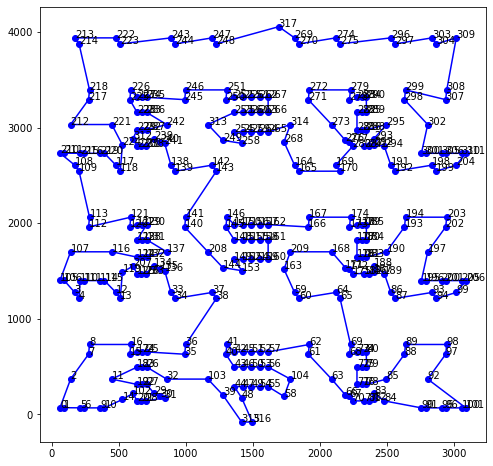

GAP IS: 0.504
Solution is valid:  True


In [16]:
x = [283,284,290,289,285,282,281,286,288,295,293,287,291,292,294,191,192,198,199,204,311,310,306,305,301,300,302,298,299,307,308,309,304,303,297,296,275,274,270,269,317,248,247,244,243,223,222,213,214,218,217,212,221,224,118,117,220,219,216,215,211,210,108,109,113,112,121,120,122,129,130,123,128,131,137,132,127,124,116,107,105,106,3,4,110,111,114,115,12,13,119,207,125,126,133,134,135,136,33,34,37,38,36,35,25,24,17,15,16,8,7,2,0,1,5,6,9,10,14,102,20,21,28,31,30,29,27,22,19,11,18,23,26,32,103,39,315,316,48,44,47,49,54,55,58,104,56,53,50,46,43,40,41,42,45,51,52,57,62,61,63,66,67,70,77,81,82,83,84,90,91,95,96,100,101,92,97,98,89,88,85,78,76,71,72,75,79,80,74,73,68,69,65,64,60,59,163,209,168,171,172,175,182,186,187,188,189,86,87,93,94,99,206,205,201,200,196,195,197,202,203,194,193,190,183,181,176,177,180,184,185,179,178,173,174,167,166,162,157,156,150,147,146,145,148,151,155,158,161,160,159,154,152,149,153,144,208,140,141,143,142,139,138,241,240,239,238,231,230,312,229,232,237,242,236,233,228,225,226,227,234,235,245,246,251,250,252,255,261,262,267,266,263,260,256,253,313,249,258,254,257,259,264,265,314,268,164,165,170,169,280,277,276,273,271,272,279,278]
P = ProblemInstance('./problems/lin318.tsp')
points = getPoints('./problems/lin318.tsp')
plotSolution(x, points)
found = compute_length(x, P.dist_matrix)
print("GAP IS:", P.GAP(found))
print("Solution is valid: ", P.ValidateSolution(x))

## FL1577

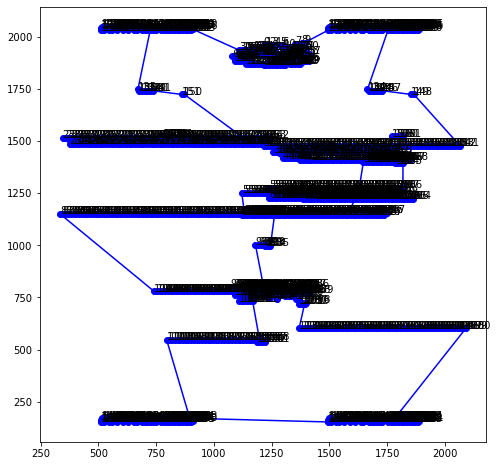

GAP IS: 1.146
Solution is valid:  True


In [17]:
x = [511,510,509,508,507,506,505,504,503,489,502,490,491,492,493,494,495,496,497,498,499,500,472,440,439,473,438,474,437,475,436,476,435,477,434,478,433,479,432,480,431,481,430,482,429,483,484,485,486,487,488,329,328,327,326,325,324,323,322,321,320,319,318,317,316,315,314,313,312,311,148,149,147,146,145,144,143,142,134,1379,1306,1380,1305,1381,1304,1382,1303,1383,1302,1384,1301,1385,1300,1386,1299,1387,1298,1388,1297,1389,1296,1390,1295,1205,1294,1206,1293,1207,1292,1208,1291,1209,1290,1210,1289,1211,1288,1212,1287,1213,1286,1214,1285,1215,1284,1216,1283,1378,1217,1218,1307,1377,1376,1375,1308,1282,1281,1309,1374,1373,1219,1310,1372,1371,1311,1220,1280,1221,1222,1279,1370,1369,1278,1223,1224,1277,1368,1312,1276,1313,1367,1366,1314,1225,1226,1227,1275,1228,1274,1315,1365,1364,9,8,7,10,6,5,4,3,2,1,0,21,22,23,24,25,14,13,12,11,34,49,35,48,61,60,50,47,51,46,59,58,84,83,69,70,52,53,72,71,81,82,100,91,99,92,98,93,94,79,80,73,54,45,36,37,44,38,43,74,78,77,75,76,41,40,42,39,15,16,17,18,19,20,55,56,57,95,96,97,109,110,108,111,107,112,106,113,105,114,133,132,131,130,129,128,115,127,116,126,117,125,118,119,120,121,122,123,124,101,88,102,103,104,89,90,62,63,64,65,66,87,86,67,85,68,33,26,32,27,31,28,29,30,1316,1363,1317,1273,1229,1230,1272,1362,1361,1318,1271,1231,1232,1233,1270,1319,1360,1359,1320,1269,1234,1268,1321,1358,1322,1357,1356,1323,1267,1235,1236,1266,1237,1238,1265,1324,1355,1325,1354,1326,1264,1239,1263,1240,1262,1327,1353,1352,1351,1350,1328,1241,1242,1261,1330,1260,1243,1244,1259,1245,1258,1246,1257,1247,1256,1248,1255,1249,1250,1251,1254,1252,1253,1336,1337,1338,1339,1335,1340,1334,1333,1341,1342,1343,1344,1332,1345,1331,1346,1347,1348,1329,1349,135,136,137,138,139,140,141,151,150,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,156,198,155,199,154,200,153,201,152,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,171,170,169,168,167,166,165,164,163,162,310,309,308,307,383,382,381,380,379,378,377,376,375,374,373,372,371,370,369,368,367,366,365,364,363,362,361,360,359,358,357,356,355,354,353,352,351,350,349,348,347,346,345,344,343,342,341,340,339,338,337,336,157,158,159,160,161,330,331,332,333,334,335,428,427,426,425,424,423,422,421,420,419,418,417,416,415,414,413,412,411,410,409,408,407,406,405,404,403,402,401,400,399,398,397,396,395,394,393,392,391,390,389,388,387,386,385,384,447,446,445,444,443,442,441,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,501,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,566,565,564,563,562,561,560,559,558,557,556,745,746,805,747,804,748,803,749,802,750,801,751,800,752,799,753,754,885,798,884,883,882,881,880,879,878,877,806,876,807,875,808,809,810,811,812,813,814,815,816,817,818,819,820,821,822,823,824,825,826,827,828,829,830,831,832,833,834,835,836,837,838,839,840,841,842,843,844,845,846,847,848,849,850,851,852,853,854,855,856,857,858,859,860,861,862,863,864,865,866,867,868,869,870,871,872,873,874,1047,1046,1045,1044,1043,1042,1041,1040,1039,1038,1037,1036,1035,1034,1033,1032,1031,1030,1029,1028,1027,1026,1025,1024,1023,1022,1021,1020,1019,959,958,960,957,961,956,955,962,1015,1014,992,963,954,964,991,965,990,966,989,967,953,952,968,951,969,950,993,994,1009,995,1008,996,986,985,1006,1007,1072,1087,1086,1071,1061,1070,1062,1063,1069,1080,1081,1082,1010,1048,1011,1012,1013,1068,1083,1085,1084,1067,1066,1016,1017,1018,1064,1065,1096,1095,1094,1093,1092,1091,1136,1137,1138,1201,1202,1203,1204,1135,1134,1133,1132,1131,1130,1129,1128,1127,1126,1125,1124,1123,1122,1121,1120,1119,1118,1117,1116,1115,1114,1113,1112,1111,1110,1109,1108,1107,1106,1105,1104,1103,1102,1404,1452,1405,1453,1406,1454,1407,1455,1408,1456,1409,1457,1410,1458,1411,1459,1412,1413,1461,1414,1462,1426,1425,1471,1511,1470,1424,1423,1469,1422,1468,1421,1467,1420,1466,1419,1465,1418,1417,1416,1464,1415,1463,1505,1547,1548,1549,1506,1550,1507,1508,1551,1552,1553,1554,1509,1555,1510,1556,1557,1558,1512,1559,1513,1560,1561,1546,1504,1545,1544,1503,1460,1502,1543,1501,1542,1500,1541,1499,1540,1498,1539,1497,1538,1496,1537,1495,1536,1494,1535,1493,1451,1403,1562,1563,1514,1472,1427,1473,1428,1429,1430,1515,1564,1565,1516,1474,1431,1517,1566,1475,1432,1476,1567,1568,1477,1433,1434,1478,1569,1518,1570,1519,1435,1436,1479,1571,1572,1520,1573,1521,1480,1437,1438,1522,1574,1575,1576,1534,1533,1492,1450,1402,1449,1401,1448,1491,1532,1490,1531,1489,1530,1488,1529,1487,1528,1486,1527,1485,1526,1484,1525,1483,1524,1482,1523,1481,1391,1439,1392,1440,1393,1441,1394,1442,1395,1443,1396,1444,1397,1445,1398,1446,1399,1447,1400,1200,1199,1198,1197,1196,1195,1194,1193,1192,1191,1190,1189,1188,1187,1186,1185,1184,1183,1182,1181,1180,1179,1178,1177,1176,1175,1174,1173,1172,1171,1170,1169,1168,1167,1166,1165,1164,1163,1162,1161,1160,1159,1158,1157,1156,1155,1154,1153,1152,1151,1150,1149,1148,1147,1146,1145,1144,1143,1142,1141,1140,1139,1099,1098,1097,1100,1101,1088,1089,1076,1054,1055,1005,1002,982,981,980,1004,1056,1003,1057,1058,1059,936,937,938,939,979,940,978,941,977,942,976,983,1001,984,1000,999,1052,1060,1053,1077,1078,1079,1051,1075,1090,1073,1074,1049,1050,997,998,943,944,945,975,946,974,947,973,948,972,987,971,988,970,949,932,931,930,929,933,928,934,935,887,886,755,756,757,888,889,758,759,890,891,760,761,892,893,762,763,894,895,764,765,896,897,766,767,898,899,768,769,900,901,770,771,902,903,772,773,904,905,774,775,906,907,776,777,908,909,778,779,780,910,911,912,781,782,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,797,796,795,794,793,792,791,790,789,788,787,786,785,784,783,725,688,726,687,727,686,728,685,729,684,730,683,731,682,732,681,733,680,734,679,735,678,736,677,737,676,738,675,739,674,740,673,741,672,742,671,743,670,744,669,668,667,666,665,664,663,662,661,660,659,658,657,656,567,655,568,654,569,653,570,652,571,651,572,650,573,649,574,648,575,647,576,646,577,645,578,644,579,643,580,642,581,641,582,640,583,639,584,638,585,637,586,636,587,635,588,634,589,633,590,632,591,631,592,630,593,629,594,628,595,627,596,626,597,625,598,624,689,724,690,723,691,722,692,721,693,720,694,719,695,718,696,717,697,716,698,715,699,714,700,713,701,712,702,711,703,710,709,708,707,706,705,704,609,610,611,612,613,614,608,615,607,616,606,617,605,618,604,619,603,620,602,621,601,622,600,623,599,521,520,519,518,517,516,515,514,513,512]
P = ProblemInstance('./problems/fl1577.tsp')
points = getPoints('./problems/fl1577.tsp')
plotSolution(x, points)
found = compute_length(x, P.dist_matrix)
print("GAP IS:", P.GAP(found))
print("Solution is valid: ", P.ValidateSolution(x))

## RAT783

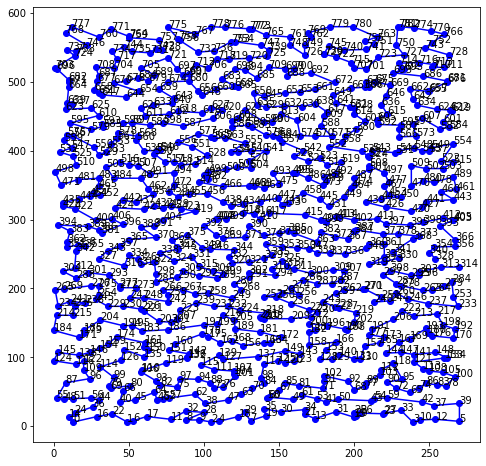

GAP IS: 2.271
Solution is valid:  True


In [18]:
x = [314,313,303,296,295,308,297,283,278,263,264,279,284,253,233,237,246,260,244,240,251,271,270,262,259,243,228,227,219,202,188,190,196,200,187,182,158,166,153,128,129,140,131,130,157,165,173,177,191,206,222,213,217,198,192,170,176,180,193,169,167,144,147,141,148,134,133,121,113,108,105,100,78,83,86,74,65,72,90,95,118,112,103,89,77,68,92,102,91,71,81,85,67,58,60,49,61,53,41,50,43,54,59,42,37,39,5,12,10,3,33,27,23,26,25,20,15,31,13,21,34,30,35,19,7,29,18,4,2,9,8,28,32,11,17,6,1,22,16,0,14,24,36,44,56,51,48,55,87,96,109,122,116,124,145,138,146,154,159,174,161,155,150,135,152,126,114,99,79,69,80,66,40,45,64,46,52,57,62,38,47,63,70,84,98,117,125,120,123,143,149,137,127,139,115,111,107,104,101,76,73,88,94,97,75,82,93,106,110,119,132,136,142,151,160,178,175,162,168,156,163,164,172,181,189,205,216,199,197,186,183,195,194,204,185,179,171,184,214,215,235,238,241,234,265,269,276,275,254,245,229,230,226,221,203,201,207,223,239,231,232,224,218,211,210,208,209,212,220,225,236,250,252,261,256,274,286,281,282,287,307,309,300,311,317,325,310,294,302,291,280,268,249,258,257,267,266,255,242,248,247,273,272,277,293,301,288,304,312,342,355,358,351,362,383,394,389,386,381,396,406,400,422,428,435,444,451,452,457,465,483,481,471,498,510,525,532,547,559,575,567,550,529,533,553,561,578,568,560,538,539,546,530,517,518,512,514,528,551,556,577,565,562,563,555,534,535,540,541,520,504,506,500,499,490,482,476,466,468,469,463,475,493,495,496,486,473,479,488,492,519,513,523,521,526,542,557,564,569,576,583,590,586,602,608,621,599,600,613,604,574,570,571,588,609,617,638,630,632,629,635,650,645,652,653,661,672,692,688,700,699,709,685,694,698,683,668,665,660,648,656,680,674,659,643,640,633,626,611,612,618,616,627,620,606,587,598,589,597,596,593,585,579,595,610,625,623,637,639,664,671,682,696,703,724,737,733,746,768,777,760,771,764,759,757,738,742,731,735,744,734,717,704,708,687,677,658,651,647,644,654,670,678,684,679,689,705,721,697,690,691,712,706,718,719,720,725,739,747,754,753,736,732,756,758,775,767,778,776,772,773,765,761,748,726,749,762,769,779,780,763,755,751,741,740,745,730,729,722,715,707,701,723,727,750,781,782,774,770,766,752,743,728,711,710,713,716,714,702,695,693,686,681,676,657,655,662,642,634,624,622,619,601,584,582,607,594,573,566,581,591,592,605,615,636,646,669,675,673,667,666,663,649,641,631,628,614,603,580,572,558,552,536,527,524,543,531,544,548,545,537,549,554,522,515,503,502,509,470,480,478,489,461,460,443,441,427,420,426,439,446,450,453,467,477,497,508,501,487,474,464,449,431,445,458,436,433,447,440,434,430,438,456,455,448,459,472,494,491,507,511,516,505,484,485,462,454,437,442,424,421,432,425,429,423,419,404,391,388,370,365,357,343,327,316,334,326,318,322,298,285,290,305,292,289,299,306,315,331,324,338,345,352,364,375,349,346,344,332,320,321,329,335,359,353,350,347,339,337,336,348,360,361,333,319,323,330,341,368,373,378,377,387,384,367,372,382,363,380,385,379,374,390,371,369,376,392,407,408,409,418,416,410,417,415,401,399,413,414,402,411,397,395,398,412,405,403,393,366,356,354,340,328]
P = ProblemInstance('./problems/rat783.tsp')
points = getPoints('./problems/rat783.tsp')
plotSolution(x, points)
found = compute_length(x, P.dist_matrix)
print("GAP IS:", P.GAP(found))
print("Solution is valid: ", P.ValidateSolution(x))

## U1060

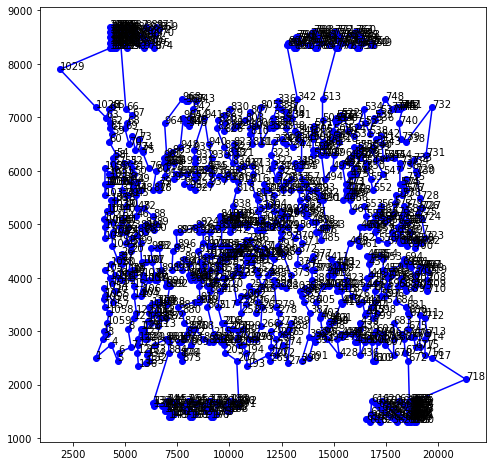

GAP IS: 2.451
Solution is valid:  True


In [19]:
x = 880,879,871,870,872,873,877,878,876,875,874,869,868,867,866,214,213,215,865,864,862,863,219,857,859,858,221,222,220,218,217,216,208,207,206,211,212,210,209,205,204,192,191,190,189,188,187,186,184,185,183,182,181,180,179,178,177,176,175,174,173,172,170,169,171,168,167,166,163,162,161,160,158,159,165,164,155,157,156,154,153,152,151,150,149,148,147,146,145,144,142,141,143,140,139,138,137,884,886,885,883,131,133,134,132,135,136,126,125,124,123,128,127,129,130,120,119,115,117,118,116,110,109,108,114,112,111,113,887,882,888,892,890,889,891,92,93,98,97,96,94,95,107,106,105,104,103,102,101,100,99,83,84,85,86,87,91,90,89,88,82,46,47,45,48,49,44,43,42,50,51,52,53,38,37,39,41,40,34,35,33,32,24,23,25,22,21,20,12,13,19,16,18,17,15,14,122,121,8,7,6,5,4,1,2,0,3,1059,1058,1057,1056,1055,1054,9,10,1052,1053,1051,1050,30,29,11,28,27,26,31,1049,1042,1043,1041,1046,1048,1047,1045,1044,1040,1039,1038,36,1033,1034,1035,1037,1036,1030,1031,1032,56,55,57,58,54,60,59,61,62,65,64,63,1028,1029,1027,1026,1018,1017,1016,1015,1012,1014,1013,1011,1010,1009,1019,1020,1025,1021,1006,1024,1023,1022,1005,1003,1004,1002,1007,1008,1000,999,1001,998,997,996,995,994,993,988,987,986,984,982,980,981,973,972,971,969,970,974,975,976,977,978,979,983,985,989,990,991,992,66,67,68,69,70,71,72,73,74,75,76,80,81,77,78,79,957,958,956,959,960,961,962,964,968,967,966,943,942,944,945,946,947,965,948,963,949,955,954,950,953,951,952,927,929,930,928,931,932,933,941,940,939,934,935,936,937,938,837,835,836,819,818,838,840,844,845,843,842,841,839,242,240,241,243,245,244,313,312,308,303,302,300,301,319,318,317,305,304,306,307,314,315,316,815,816,814,813,817,820,821,823,822,834,833,832,827,828,826,831,829,830,825,824,808,807,809,810,811,806,805,812,333,331,330,332,334,335,336,337,340,339,338,344,327,328,329,324,323,322,321,320,325,326,350,349,351,353,352,362,363,364,365,366,368,367,489,488,487,486,485,484,483,491,490,492,493,359,358,360,361,357,355,354,348,356,347,345,346,343,341,342,804,803,802,801,800,799,798,797,796,795,794,793,792,791,790,789,788,786,787,782,785,784,783,781,780,779,778,774,773,772,771,775,770,769,768,763,762,761,760,758,759,754,753,750,749,751,752,755,756,757,764,765,766,767,776,777,513,504,501,497,499,500,505,511,512,510,509,508,507,506,498,494,495,496,518,519,517,502,503,515,514,516,520,521,522,523,524,531,532,534,533,538,535,536,537,748,747,746,745,744,743,742,741,740,739,738,732,731,733,734,729,730,728,727,726,725,724,723,722,699,698,700,697,695,696,590,589,588,586,585,583,582,581,580,579,584,587,568,569,570,558,557,559,560,556,561,562,563,564,565,566,567,571,572,573,578,576,577,735,575,574,736,737,544,545,546,543,542,541,540,539,548,547,552,551,550,549,528,529,530,526,527,525,478,480,479,481,482,473,472,465,469,470,471,475,474,477,476,468,467,466,464,553,554,555,459,460,461,462,463,422,423,424,425,426,440,441,442,443,444,599,598,445,450,451,447,446,448,449,457,458,456,455,454,453,452,597,596,595,594,593,592,591,693,694,692,691,690,701,705,706,707,721,720,719,708,709,710,702,704,703,689,688,687,686,685,684,681,680,679,675,676,678,677,715,711,712,713,714,716,717,718,655,656,654,658,653,652,648,651,650,649,647,645,646,644,660,661,643,641,640,639,638,637,636,635,630,629,628,626,624,622,623,617,616,615,614,613,611,612,618,619,620,621,625,627,631,632,633,634,668,642,663,662,659,657,664,665,666,667,669,672,671,673,674,683,682,670,607,608,606,603,604,605,609,610,602,601,600,436,437,438,439,434,435,433,432,431,430,429,427,428,397,398,399,402,400,401,415,416,417,418,413,414,412,419,421,420,411,410,409,408,407,406,405,403,404,396,395,394,393,391,390,392,387,386,385,384,383,382,381,380,379,378,377,376,375,374,372,371,369,370,295,296,298,299,297,294,293,292,291,290,289,373,280,281,283,282,279,278,277,276,275,388,389,273,274,272,268,267,271,269,270,193,194,198,203,202,201,200,199,197,196,195,266,265,263,264,255,256,257,262,261,258,260,259,223,231,232,233,234,235,249,250,248,251,252,254,253,285,284,288,287,286,311,310,309,247,246,239,238,237,236,230,229,227,228,852,853,226,225,224,855,856,854,851,846,847,848,849,850,922,919,921,920,918,860,861,914,913,915,916,917,923,924,925,926,898,897,896,895,893,894,900,899,901,902,905,903,904,906,912,911,907,910,909,908,881
P = ProblemInstance('./problems/u1060.tsp')
points = getPoints('./problems/u1060.tsp')
plotSolution(x, points)
found = compute_length(x, P.dist_matrix)
print("GAP IS:", P.GAP(found))
print("Solution is valid: ", P.ValidateSolution(x))

## CH130

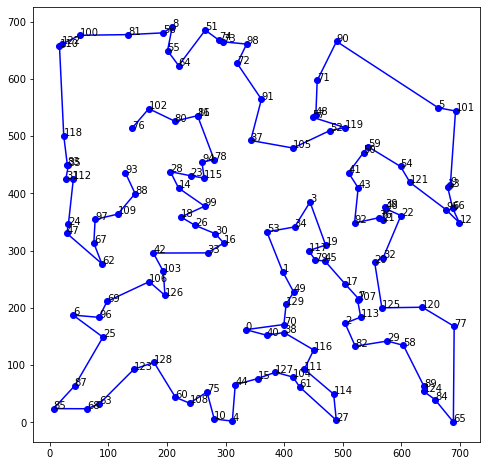

GAP IS: 0.0
Solution is valid:  True


In [20]:
x = [93,88,109,97,67,62,47,24,112,31,35,83,118,110,122,100,81,56,8,55,64,51,74,73,98,72,91,37,105,52,119,57,48,71,90,5,101,9,13,66,12,95,121,54,59,50,41,43,92,36,21,39,46,22,32,20,125,120,77,65,84,124,89,58,29,82,2,113,107,7,17,45,79,117,19,3,34,53,1,49,129,70,0,40,38,116,111,114,27,61,104,127,15,44,4,10,75,108,60,128,123,63,68,85,87,25,6,96,69,106,126,103,42,33,16,30,26,18,99,14,28,23,115,94,78,86,11,80,102,76]
P = ProblemInstance('./problems/ch130.tsp')
points = getPoints('./problems/ch130.tsp')
plotSolution(x, points)
found = compute_length(x, P.dist_matrix)
print("GAP IS:", P.GAP(found))
print("Solution is valid: ", P.ValidateSolution(x))

## EIL76

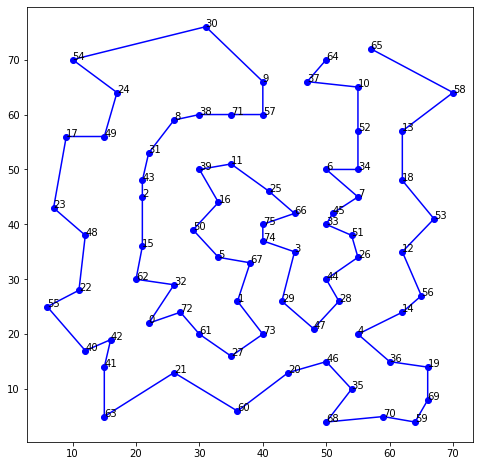

GAP IS: 0.0
Solution is valid:  True


In [21]:
x = [64,37,10,52,34,6,7,45,33,51,26,44,28,47,29,3,74,75,66,25,11,39,16,50,5,67,1,73,27,61,72,0,32,62,15,2,43,31,8,38,71,57,9,30,54,24,49,17,23,48,22,55,40,42,41,63,21,60,20,46,35,68,70,59,69,19,36,4,14,56,12,53,18,13,58,65]
P = ProblemInstance('./problems/eil76.tsp')
points = getPoints('./problems/eil76.tsp')
plotSolution(x, points)
found = compute_length(x, P.dist_matrix)
print("GAP IS:", P.GAP(found))
print("Solution is valid: ", P.ValidateSolution(x))

## D198

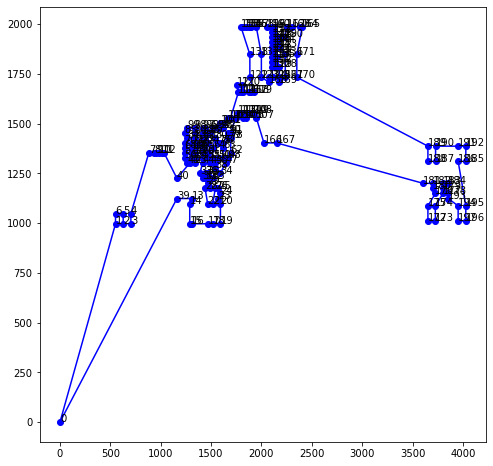

GAP IS: 0.0
Solution is valid:  True


In [22]:
x = [9,8,7,4,3,2,5,6,1,0,39,13,14,15,16,17,18,19,20,23,24,25,26,21,22,28,29,27,33,32,35,36,31,30,37,44,53,60,65,73,81,74,61,52,45,51,64,80,75,76,77,63,49,50,46,38,34,47,48,62,78,79,90,91,104,113,112,111,105,106,110,109,108,107,166,167,181,182,180,176,175,172,173,174,177,179,183,184,178,193,194,197,196,195,186,185,192,191,190,187,188,189,170,171,165,164,163,162,150,149,144,143,136,127,169,126,128,135,134,140,142,145,148,151,161,160,159,152,147,146,141,139,133,131,132,129,130,125,124,168,123,137,158,157,156,155,154,153,138,122,119,118,117,116,115,120,121,114,103,102,101,92,93,100,94,95,89,88,96,97,87,82,69,66,59,54,43,55,58,67,71,72,83,86,98,99,85,84,70,68,57,56,41,42,40,12,11,10]
P = ProblemInstance('./problems/d198.tsp')
points = getPoints('./problems/d198.tsp')
plotSolution(x, points)
found = compute_length(x, P.dist_matrix)
print("GAP IS:", P.GAP(found))
print("Solution is valid: ", P.ValidateSolution(x))

## KROA100

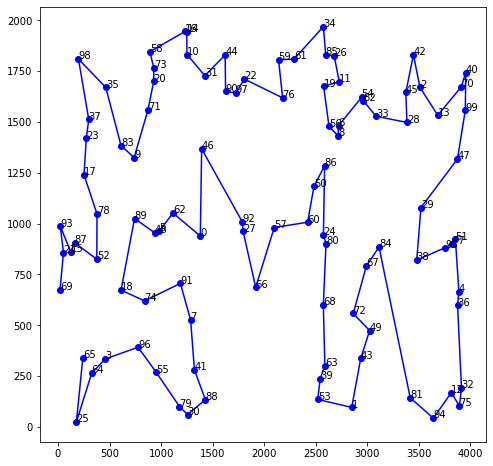

GAP IS: 0.0
Solution is valid:  True


In [23]:
x = [65,25,64,3,96,55,79,30,88,41,7,91,74,18,89,48,5,62,0,46,92,27,66,57,60,50,86,24,80,68,63,39,53,1,43,49,72,67,84,81,94,12,75,32,36,4,51,77,95,38,29,47,99,40,70,13,2,42,45,28,33,82,54,6,8,56,19,11,26,85,34,61,59,76,22,97,90,44,31,10,14,16,58,73,20,71,9,83,35,98,37,23,17,78,52,87,15,93,21,69]
P = ProblemInstance('./problems/kroA100.tsp')
points = getPoints('./problems/kroA100.tsp')
plotSolution(x, points)
found = compute_length(x, P.dist_matrix)
print("GAP IS:", P.GAP(found))
print("Solution is valid: ", P.ValidateSolution(x))

In [33]:
d = {'problem': ['ch130', 'd198', 'eil76', 'fl1577', 'kroa100', 'lin318', 'pcb442', 'pr439', 'rat783', 'u1060'], \
     'best_known': [6110, 15780, 538, 22249, 21282, 42029, 50778, 107217, 8806,224094],\
     'best_found': [6110, 15780, 538, 22504, 21282, 42241, 51222, 107518, 9006, 229587], \
     'iterations': [34917, 59257, 5192, 578, 973, 3792, 10272, 10672, 3017, 1604]}
df = pd.DataFrame(data=d)
df['gap'] = ((df['best_found'] - df['best_known'])/df['best_known']) * 100

In [34]:
df

,problem,best_known,best_found,iterations,gap
0,ch130,6110,6110,34917,0.000000
1,d198,15780,15780,59257,0.000000
2,eil76,538,538,5192,0.000000
3,fl1577,22249,22504,578,1.146119
4,kroa100,21282,21282,973,0.000000
5,lin318,42029,42241,3792,0.504414
6,pcb442,50778,51222,10272,0.874394
7,pr439,107217,107518,10672,0.280739
8,rat783,8806,9006,3017,2.271179
9,u1060,224094,229587,1604,2.451204


## Gap found = 0.75

Note that the number of iterations is either when the best known was found or 3 minutes passed. Note also that for the smaller problems an almost optimal solution was found a lot earlier (in terms of iterations) but to arrive at the optimal one many more solutions were needed.

In [36]:
df['gap'].mean()

0.7528048285123633